In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fftshift
from scipy.io import wavfile
from utils import plot_psd, psd, read_iq, welch, read_iq, welch, frequency_shift, lowpass

### FM demodulation

In [3]:
def fm_demod_1(iq_samples):
  return np.angle(iq_samples[1:] * np.conj(iq_samples[:-1]))
  

def fm_demod_2(iq_samples):
  xq, xi = np.imag(iq_samples), np.real(iq_samples)
  d_xq, d_xi = np.diff(xq, prepend=xq[0]), np.diff(xi, prepend=xi[0])
  return (xi * d_xq - xq * d_xi) / (xq ** 2 + xi ** 2)


def demodulate(iq_samples, demod=fm_demod_1):
  dec_iq_samples = signal.decimate(iq_samples, 10)
  demod = demod(dec_iq_samples)
  demod_dec = signal.decimate(demod, 5)
  return demod_dec / np.abs(demod_dec).max()

In [12]:
iq_samples = np.fromfile('data/fm_rds_250k_1Msamples.iq', dtype=np.complex64)

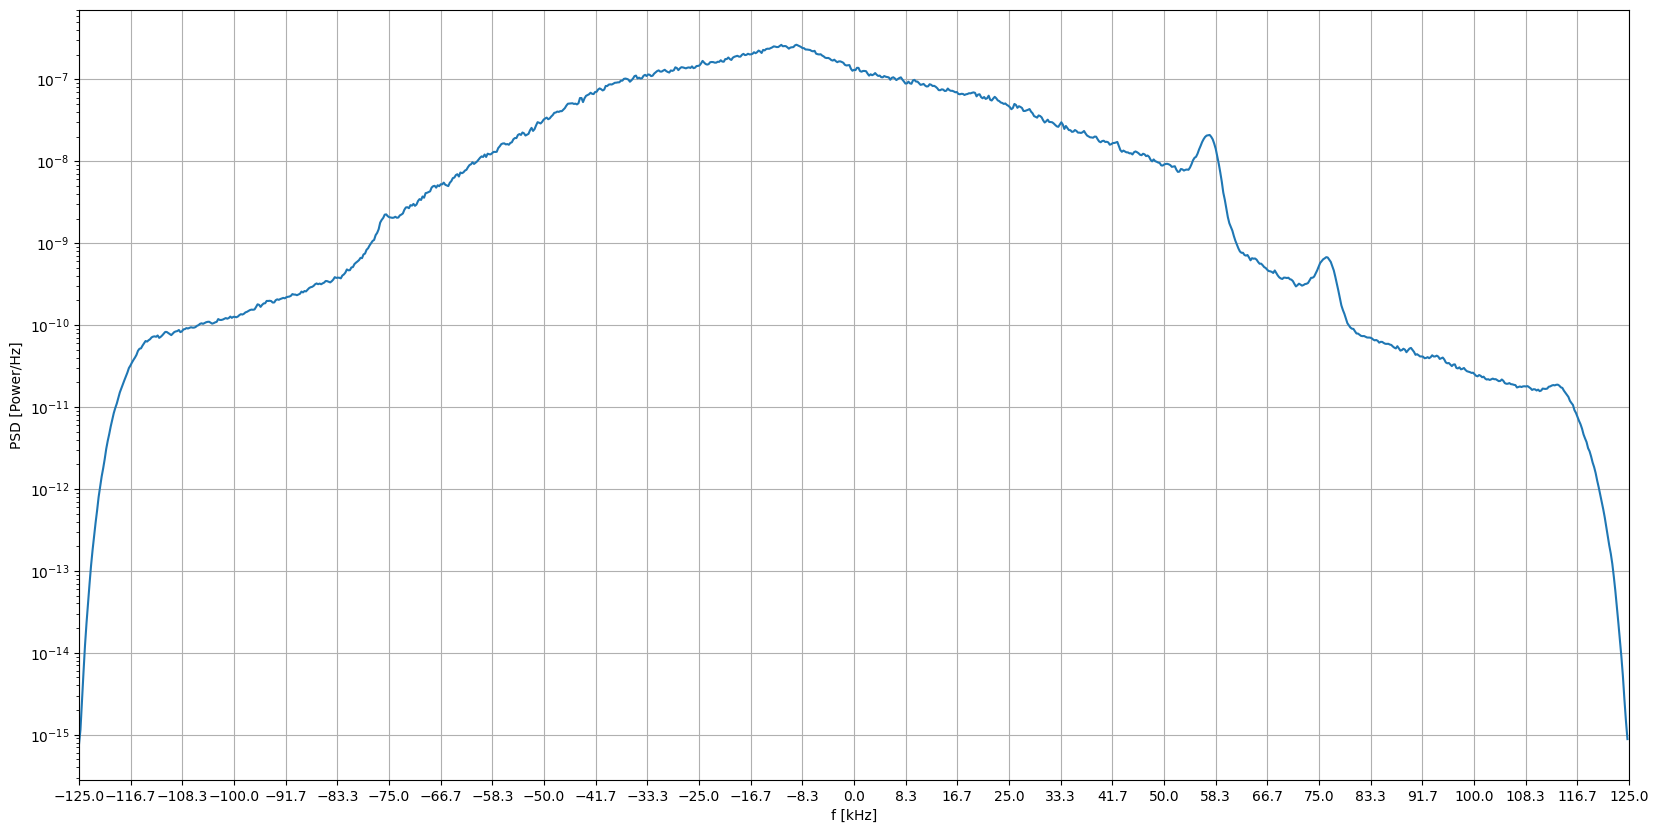

In [13]:
sample_rate = 250000
welch(iq_samples, sample_rate)

### Phase derivative (diff) with conjugate multiplication
Maybe avoids wrapping?

In [16]:
phase_diff = np.angle(iq_samples[1:] * np.conj(iq_samples[:-1]))

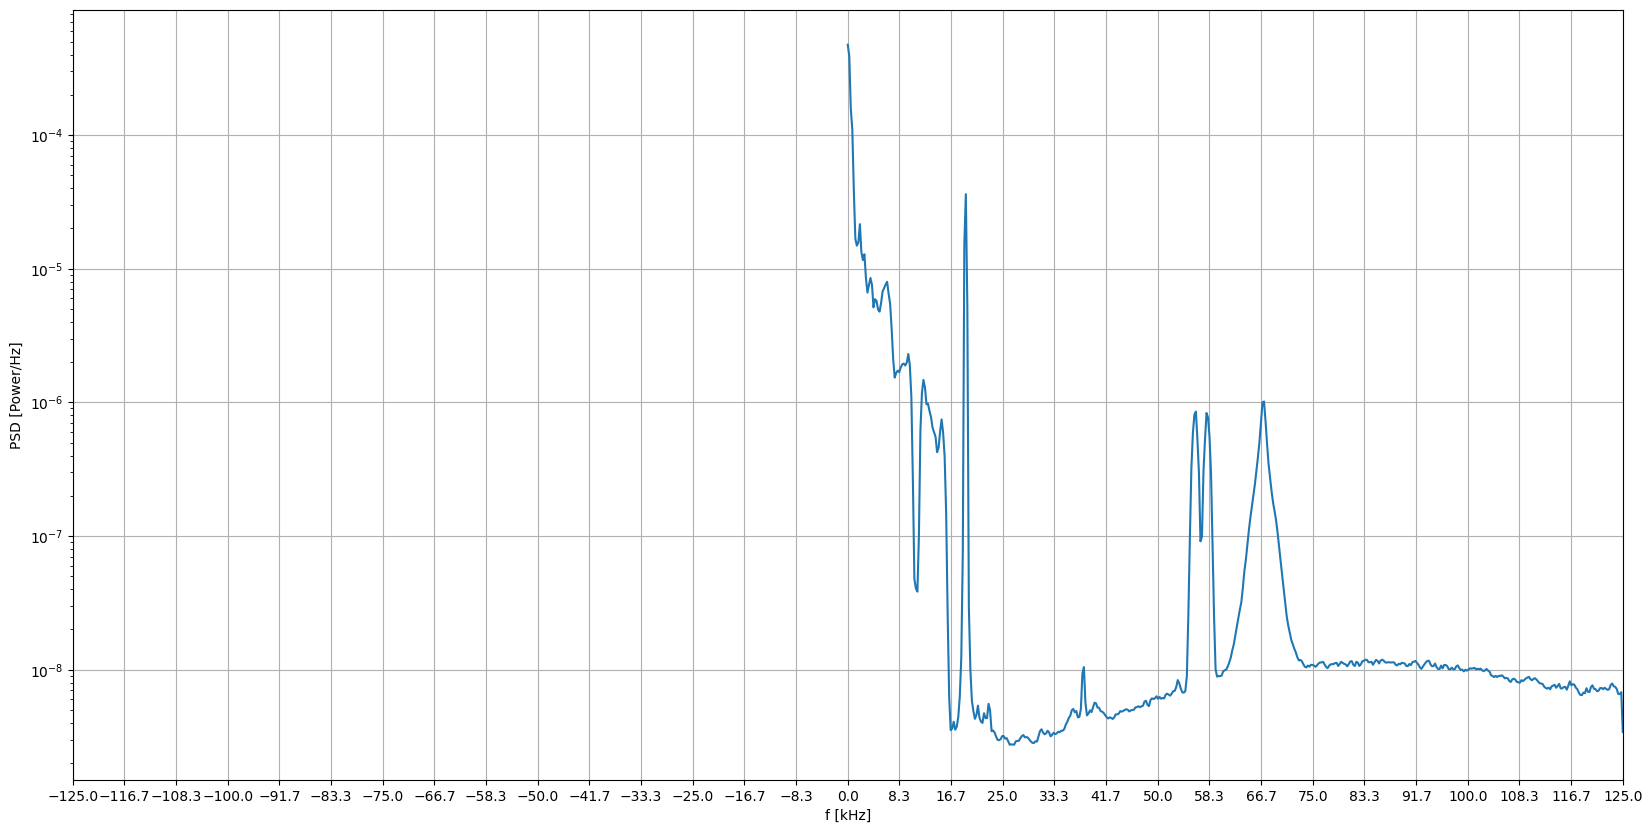

In [18]:
welch(phase_diff, sample_rate)

### Shift and filter for pilot tone and RDS signal
Also, decimate by 10.

In [35]:
sample_rate1 = sample_rate / 10
rds_samples = lowpass(frequency_shift(iq_samples, -57000, sample_rate), sample_rate, 7500)[::10]  # 7.5kHz from standard 1.3?

In [36]:
pilot_samples = lowpass(frequency_shift(iq_samples, -19000, sample_rate), sample_rate, 7500)[::10]  # 7.5kHz from standard 1.3?

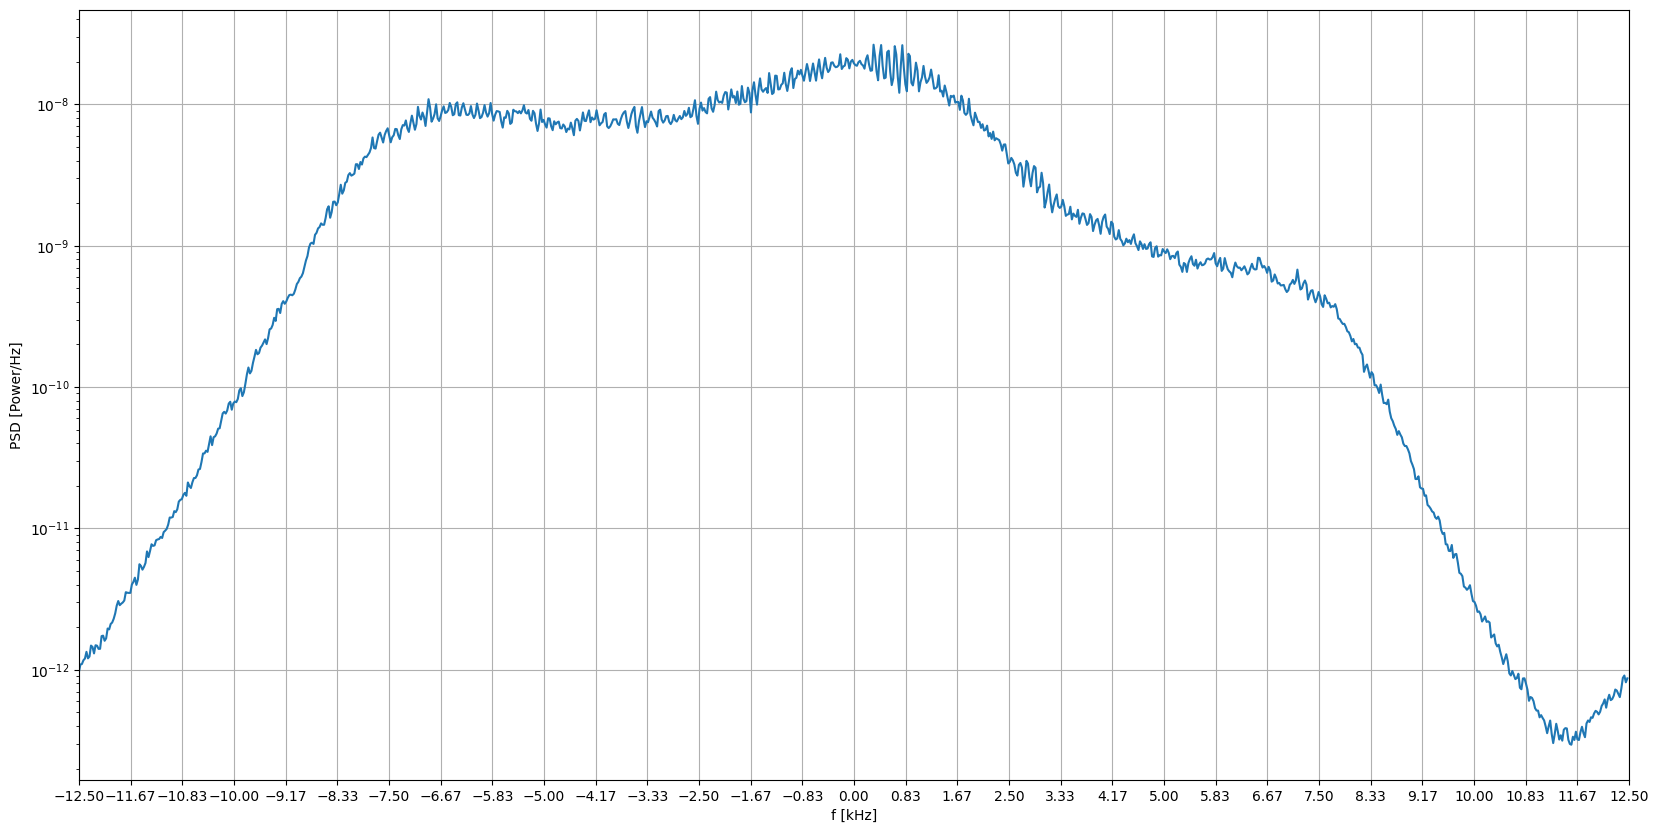

In [37]:
welch(rds_samples, sample_rate1)

### ?Resample?

### Time sync to get symbols

### Time sync to get symbols using pilot tone
Is it still required to perform fine frequency sync (Costas loop) if we use pilot tone?